# Bank Loan Defaulter Detection

### Domain Introduction:
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.  
 Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.  
 If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. 
 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment. 



##### Problem Statement:
    
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company 

2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 

##### importing the necessary libraries

In [2]:
import pandas as pd     #data processing
import numpy as np      #Linear Algebra      
import matplotlib.pyplot as plt #Data visualization
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [3]:
df=pd.read_excel('D:\\Datascience\\bank loan risk- aap\\loan.xlsx') # reading the data set

##### Data inspection

In [4]:
print(df.shape)

(39717, 41)


In [5]:
pd.set_option('display.max_columns',50)   # To display all the columns of the data set we set the max. limit
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,0.539,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0


##### Columns  	Description

id-- A unique LC assigned ID for the loan listing.

member_id--A unique LC assigned Id for the borrower member.

loan_amnt--The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces             the loan amount, then it will be reflected in this value.

funded_amnt--The total amount committed to that loan at that point in time.

funded_amnt_inv--	The total amount committed by investors for that loan at that point in time.

term--The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate--Interest Rate on the loan

installment--The monthly payment owed by the borrower if the loan originates.

grade--LC assigned loan grade

sub_grade--LC assigned loan subgrade

emp_length--Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

home_ownership--The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

annual_inc-- The self-reported annual income provided by the borrower during registration.

verification_status--	Indicates if income was verified by LC, not verified, or if the income source was verified

issue_d--	The month which the loan was funded

dti--	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

delinq_2yrs--	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

earliest_cr_line--	The month the borrower's earliest reported credit line was opened

inq_last_6mths--	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

mths_since_last_delinq--The number of months since the borrower's last delinquency.

mths_since_last_record--	The number of months since the last public record.

open_acc--	The number of open credit lines in the borrower's credit file.

pub_rec--	Number of derogatory public records

revol_bal--	Total credit revolving balance

revol_util--	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc--	The total number of credit lines currently in the borrower's credit file

out_prncp--	Remaining outstanding principal for total amount funded

out_prncp_inv--	Remaining outstanding principal for portion of total amount funded by investors

total_pymnt--	Payments received to date for total amount funded

total_pymnt_inv--	Payments received to date for portion of total amount funded by investors

total_rec_prncp--	Principal received to date

total_rec_int--	Interest received to date

total_rec_late_fee--	Late fees received to date

recoveries--	post charge off gross recovery

collection_recovery_fee--	post charge off collection fee

last_pymnt_d--Last month payment was received

last_pymnt_amnt--	Last total payment amount received

next_pymnt_d--	Next scheduled payment date

last_credit_pull_d--	The most recent month LC pulled credit for this loan

pub_rec_bankruptcies--	Number of public record bankruptcies


## Target Variable:

loan_status: Status of the loan

In [6]:
df['loan_status'].value_counts()   #lets check the unique values of our target variable    

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Fully paid: Applicant has fully paid the loan (the principal and the interest rate) 

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. 

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
e

From the above information we can see the size of the file is 12.4 MB.

There are 19- float variables, 10- int variables and 7- object variables 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0000,516221.0000,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.0000,666780.0000,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.0000,5500.0000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.0000,5400.0000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0000,5000.0000,8975.000000,1.440000e+04,3.500000e+04
int_rate,39717.0,0.120212,0.037248,0.0542,0.0925,0.118600,1.459000e-01,2.459000e-01
installment,39717.0,324.561922,208.874874,15.6900,167.0200,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.0000,40404.0000,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.0000,8.1700,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.0000,0.0000,0.000000,0.000000e+00,1.100000e+01


from the above description we can see some outliers like:

anual_income:75th percentile is 82,000 but max is 60,00,000. We can call it as business outliers as income of some can be higher depending on their experience and designation.

out_prncp:75th percentile is 0 but the max is 4

collection_recovery_fee: 75th percentile is 0 where as max value 7002 which is an outlier

similarly with out_prncp and out_prnp_inv the difference between the 75th percentile value and the max value is very high.

We also see that variables like  mths_since_last_delinq, mths_since_last_record, revol_util, pub_rec_bankruptcies have some missing values. We shall have a detailed investigation into it.


In [9]:
df.describe(include='object').T

,count,unique,top,freq
term,39717,2,36 months,29096
grade,39717,7,B,12020
sub_grade,39717,35,B3,2917
emp_length,38642,11,10+ years,8879
home_ownership,39717,5,RENT,18899
verification_status,39717,3,Not Verified,16921
loan_status,39717,3,Fully Paid,32950


We notice that the emp_length has some missing values.

There are two grade categories grade and sub_grade. sub_grade has higher labels than the grade variable.

loan_status is our target variables. we see it has three levels, with fully paid consisting of the highest frequecy

Let us convert the object type variable into categorical variables as it will reduce the memory consumptions 

In [10]:
for col in df.select_dtypes('object'):
    df[col]=df[col].astype('category')

##### Pre Processing Data

Lets check the continuity of some variables and convert them into their relevant datatypes

In [11]:
df['pub_rec_bankruptcies'].unique()  # there are only three categories in this variable

array([ 0.,  1.,  2., nan])

In [12]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].astype('category') # it is better to change its dtype to categorical

##### Missing values

Lets graphically present the missing values in our dataset.

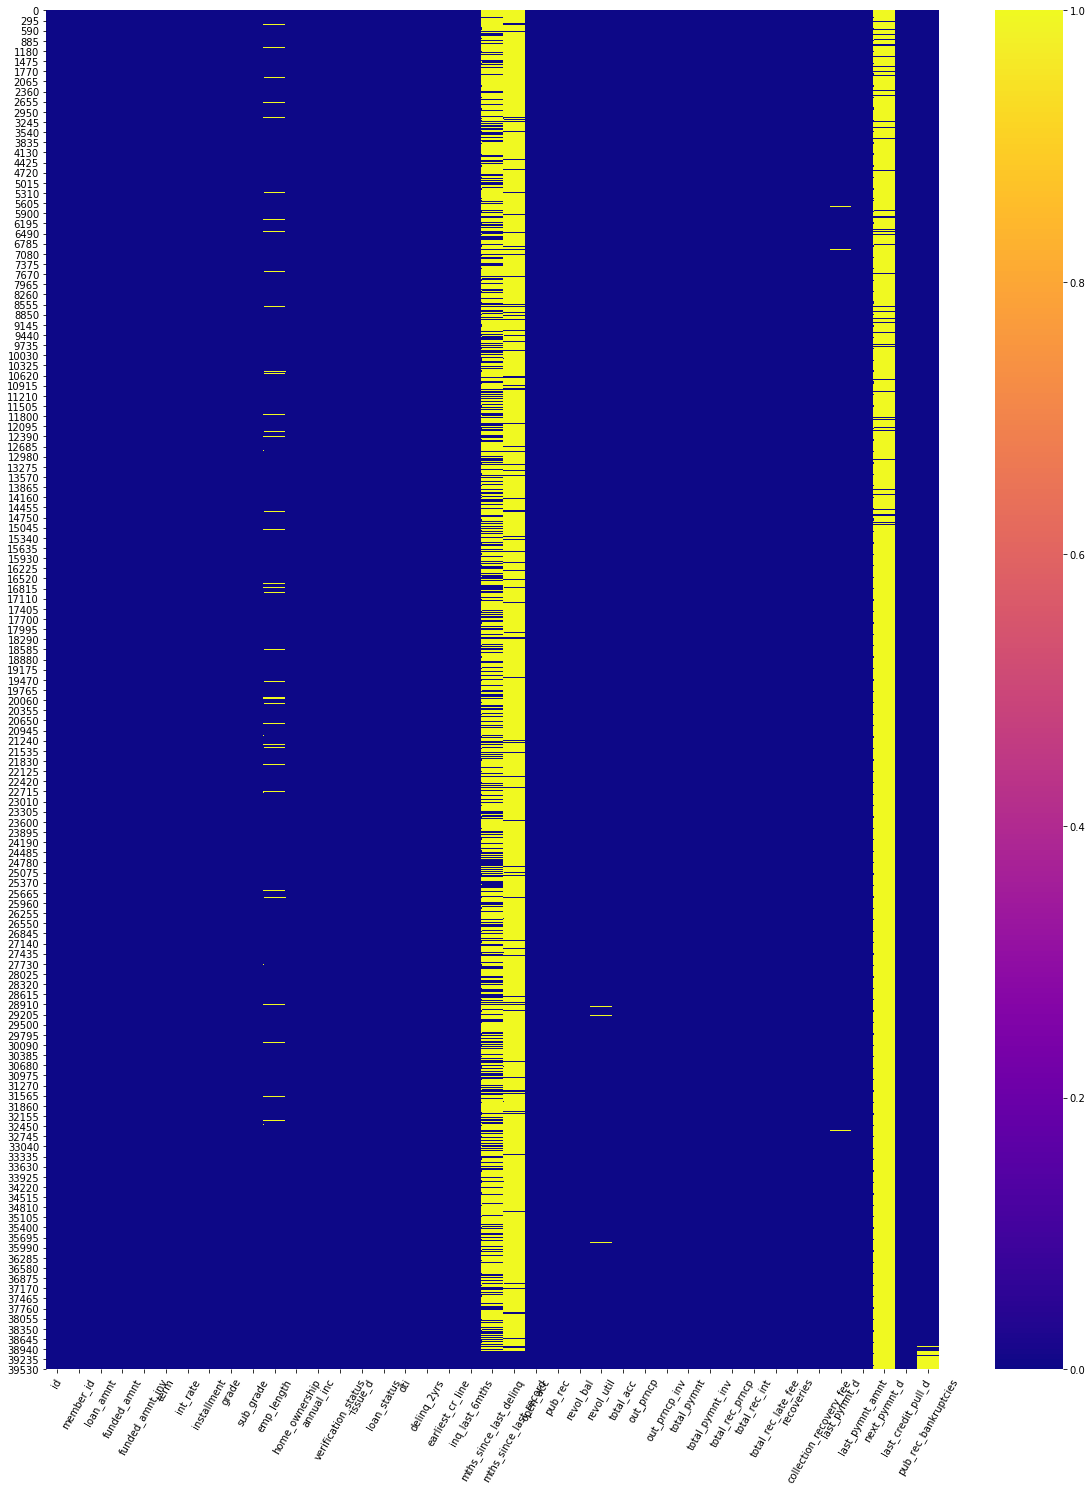

In [13]:
plt.figure(figsize=(20,25))
sns.heatmap(df.isnull(),xticklabels=df.columns, cmap='plasma')
plt.xticks(rotation=60)
plt.show()

from the above heat map we can see that the variables like 'mths_since_last_record' and 'next_payment_d' have maximum no. of missing datas. lets analyze the same mathematically. lets see the percentage of missing values for each variables.

lets calculate the null values in terms of %, and store it in the tabular format

In [14]:
columns=[]
null_values=[]
percentage=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        null=df[col].isnull().sum()
        null_values.append(null)
        percent=np.round((null/df[col].isnull().count())*100,2)
        percentage.append(percent)
        columns.append(col)    

In [15]:
summary=pd.DataFrame({'columns':columns, 'null_values':null_values, '%': percentage})

In [16]:
summary.sort_values(by='%', ascending=False)

,columns,null_values,%
5,next_pymnt_d,38577,97.13
2,mths_since_last_record,36931,92.99
1,mths_since_last_delinq,25682,64.66
0,emp_length,1075,2.71
7,pub_rec_bankruptcies,697,1.75
4,last_pymnt_d,71,0.18
3,revol_util,50,0.13
6,last_credit_pull_d,2,0.01


from the above table we can see that variables 'mths_since_last_delinq', 'mths_since_last_record' and 'next_pymnt_d' have 64.66%. 93% and 97% of missing data respectively. variables with more than 60% of missing values will not help us in the analysis in any way. so, its better that we drop these variable

In [17]:
df=df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)
# dropping the variables with more than 60% of missing values

lets fill in the missing values for the remaning variable

In [18]:
for col in df.select_dtypes('category'):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].value_counts().index[0])


In [19]:
for col in df.select_dtypes(('int64', 'float64')):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].median())


In [20]:
df.shape # We check for the shape of the dataset. just to make sure

(39717, 38)

lets use foward fill method to handle missing value in 'last_credit_pull_d' and last_pymnt_d variable

In [21]:
df['last_credit_pull_d']=df['last_credit_pull_d'].ffill()

In [22]:
df['last_pymnt_d']=df['last_pymnt_d'].ffill()

##### Out- lier Analysis

id and member_id are are not required for further analysis So we shall drop those two variables. 

In [23]:
df=df.drop(['id', 'member_id'], axis=1) 

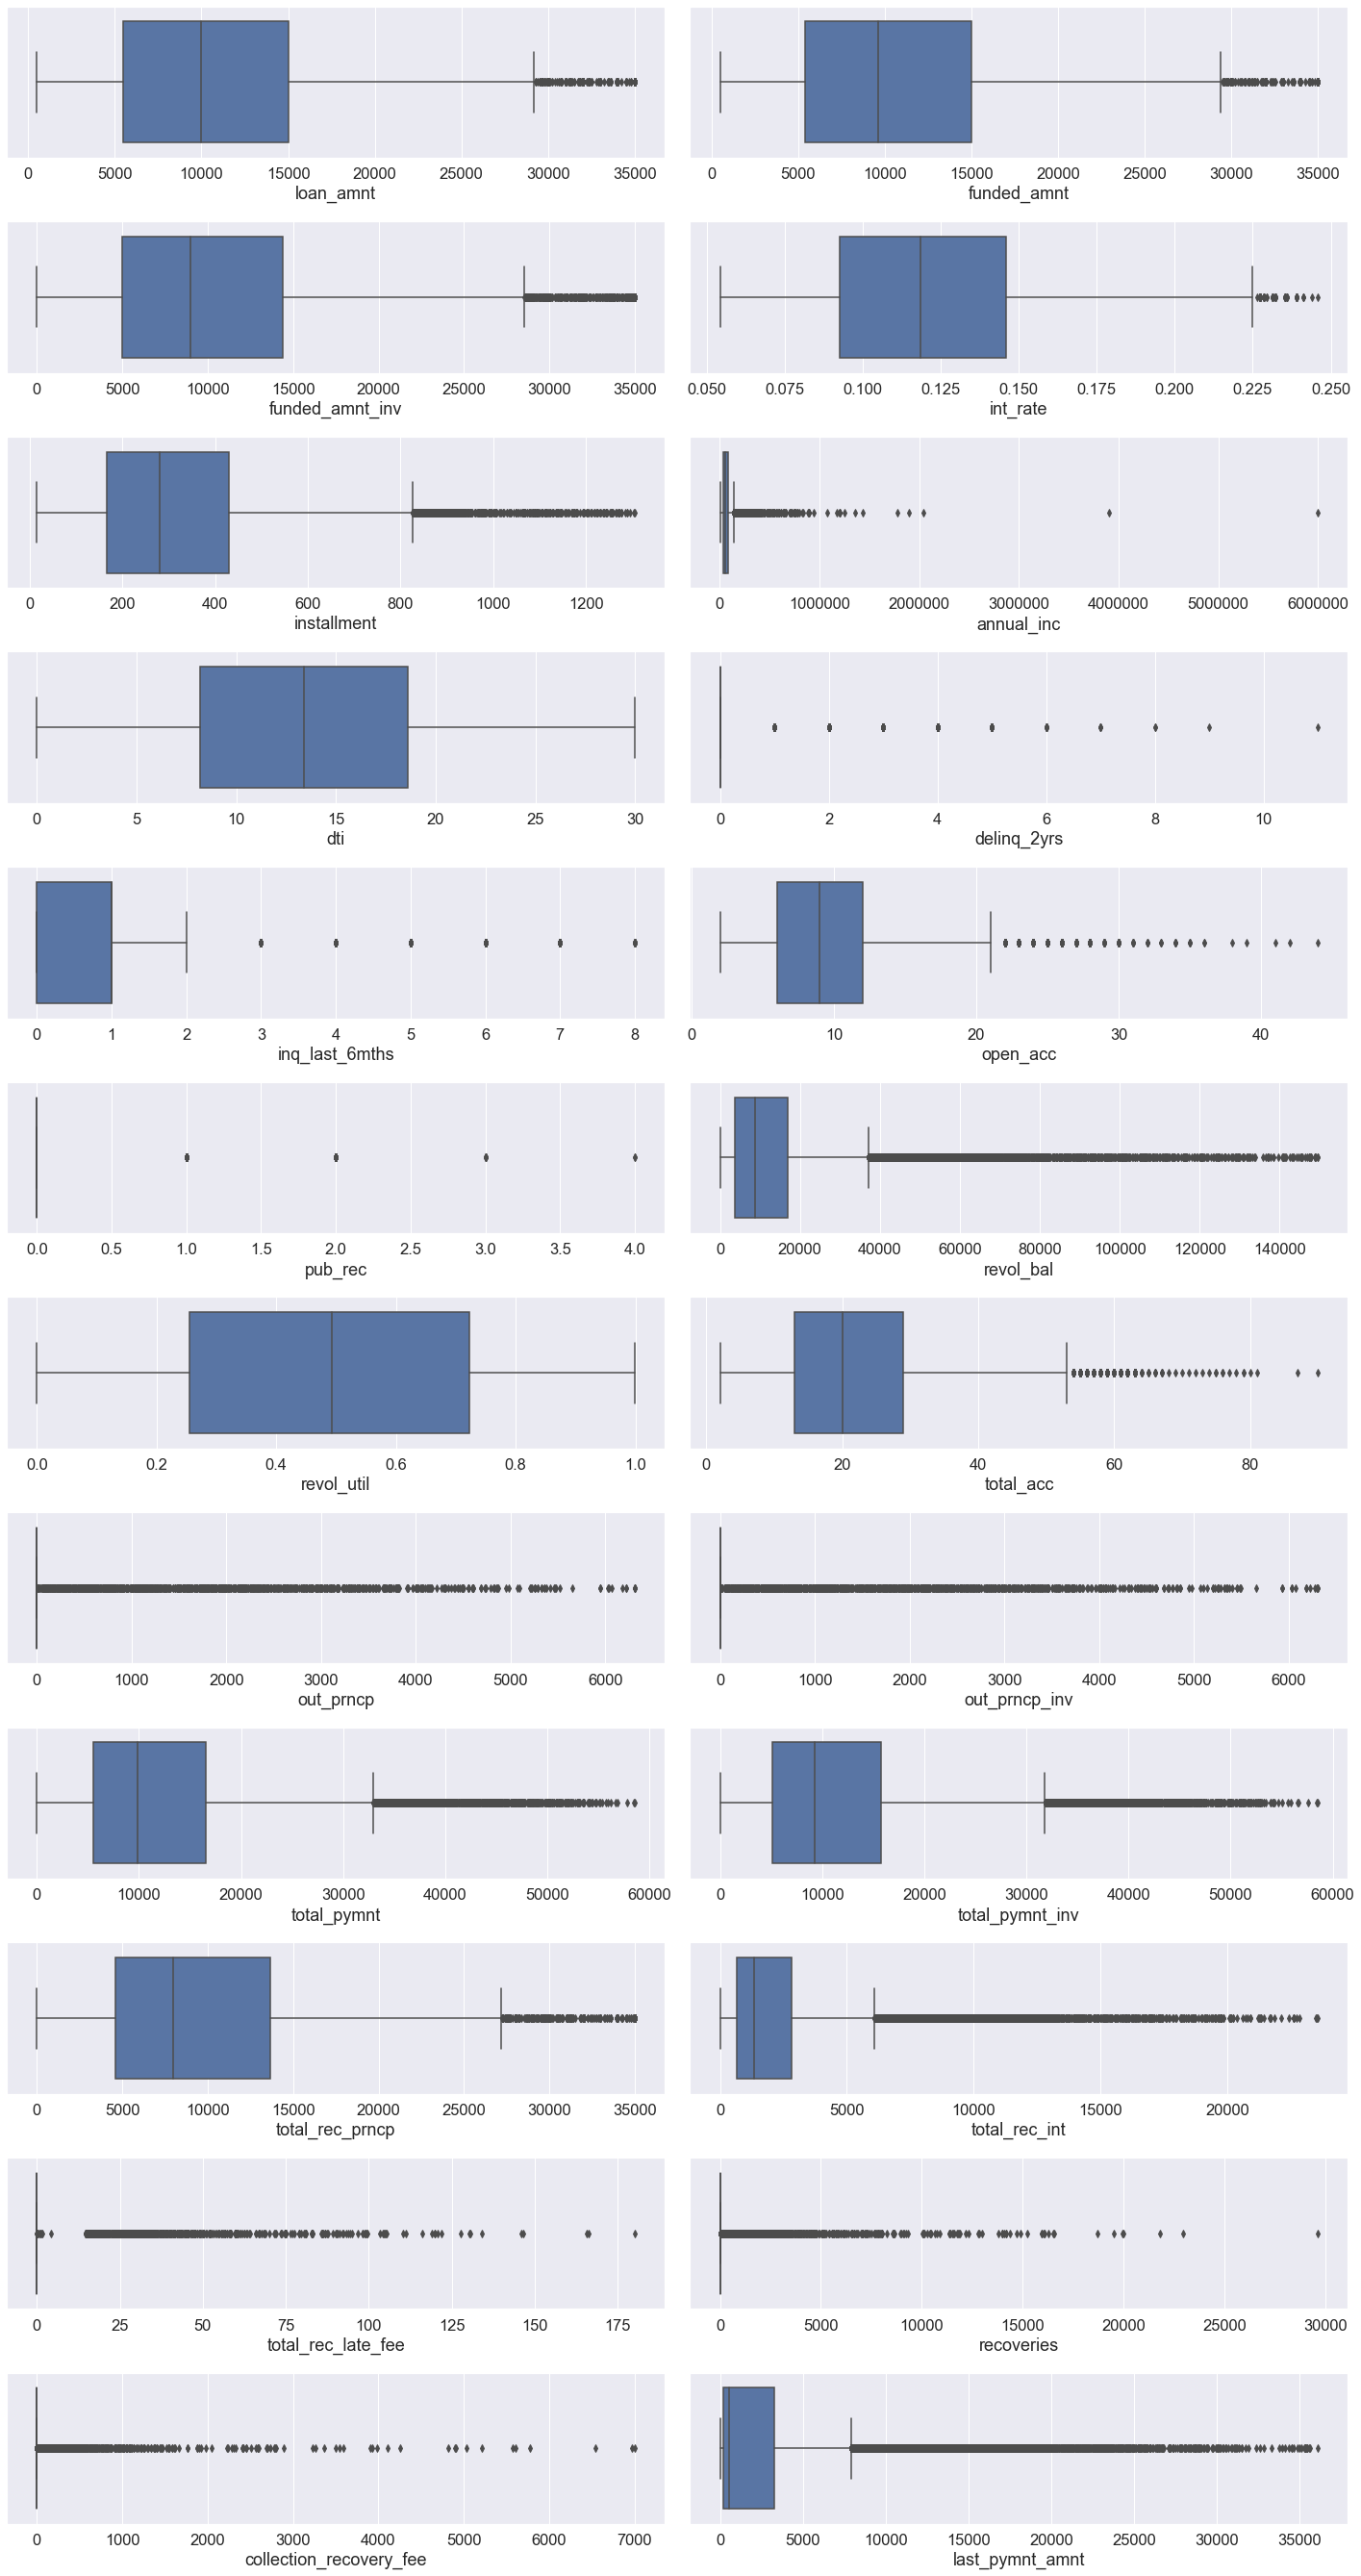

In [24]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,40))
num_col=[]
n=1
for col in df.select_dtypes(('int64', 'float64')):
    plt.subplot(13,2,n)
    sns.boxplot(df[col])
    plt.tight_layout()
    n=n+1
plt.show()

We notice that most of our data is positively sckewed. We cannot removed the outliers on theoritical basis and risk loosing important information.So, We will do some deeper analysis and understand the patterns of different variable


let see the sacatter of loan_amount sanctioned with respect to the annual income

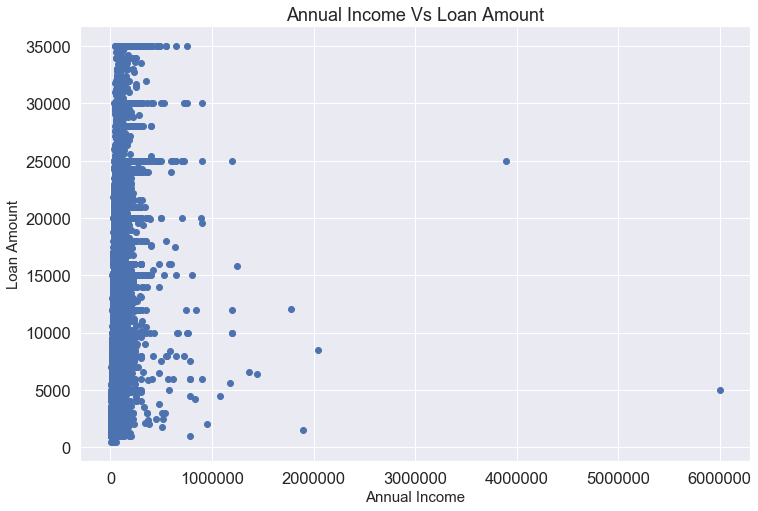

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df['annual_inc'], df['loan_amnt'])
plt.title('Annual Income Vs Loan Amount', fontsize=18)
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Loan Amount', fontsize=15)
plt.show()

from the above plot we can clearly that the 400K and 600K annual income is an outlier. Lets dig deeper into these cases before dropping them

In [26]:
df[df['annual_inc']>3000000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
29639,25000,15500,11430.00082,60 months,0.1062,334.08,B,B3,3 years,MORTGAGE,3900000.0,Not Verified,2010-06-01,Fully Paid,0.20,0,1999-09-01,3,12,0,3270,0.102,32,0.0,0.0,20044.62000,13756.41,15500.0,4544.62,0.0,0.0,0.0,2015-06-01,353.14,2015-06-01,0.0
30107,5000,5000,5000.00000,36 months,0.1273,167.84,C,C1,10+ years,MORTGAGE,6000000.0,Source Verified,2010-05-01,Fully Paid,0.01,0,2001-01-01,1,2,0,1434,0.377,10,0.0,0.0,5514.49306,5514.49,5000.0,514.49,0.0,0.0,0.0,2011-04-01,3845.25,2011-05-01,0.0


from the above observation we see that the loan amount applied by both parties is 25k and 5k respectively. Practically speaking, people with such high annual income will not be applying loan for such lower amount. We can definitely say that there is some value imputation error here at the annual income variable. So, it is safe to drop there two observations.

In [27]:
df=df[df['annual_inc']<3000000]

there are two types of grading system. one grade and the other is sub-grade, sub grade is nothing but a further categorization of the 'grade' variable. lets see how many levels does these two variable have and based on that we might wanna drop one of the variable 

In [28]:
df['grade'].value_counts()

B    12019
A    10085
C     8097
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [29]:
df['sub_grade'].value_counts()

B3    2916
A4    2886
A5    2742
B5    2704
B4    2512
C1    2135
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

We notice that grade variable has 7 levels i.e. A-G where as sub_grade has 35 levels from A1 to A5 -G1 to G5, both the variables explain the same factors. Since, Sub_grade has high cardinality (i.e. too many levels), its better we choose grade variable ove sub_grade because the grade varibale gives enough explaination with limited level.

In [30]:
df=df.drop('sub_grade', axis=1)

### Exploratory Data Analysis

Univariate Analysis- Target variable

In [31]:
df['loan_status'].value_counts()

Fully Paid     32948
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [32]:
size=[df.loan_status[df['loan_status']=='Fully Paid'].count(),df.loan_status[df['loan_status']=='Charged Off'].count(),df.loan_status[df['loan_status']=='Current'].count()]


In [33]:
labels=['Fully paid', 'Charged off', 'Current']

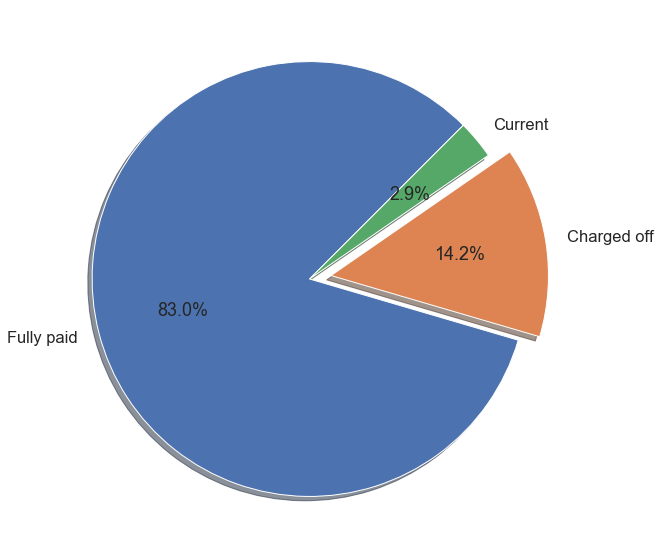

In [34]:
plt.figure(figsize=(10,10))
plt.pie(size, labels=labels, explode=(0,0.1,0), shadow=True, autopct='%1.1f%%', startangle=45)
plt.show()

We are more interested in learning about the charged off section which forms mere 14.2% of the total data set. Where as Fully paid forms wooping 83% of this sample set. We can see a sever data imbalance here. We need to work on this imbalaced data later on before fitting it with models. Meanwhile we can get more infrenceses through visualization.

Univariate Analysis- Continuous Variables

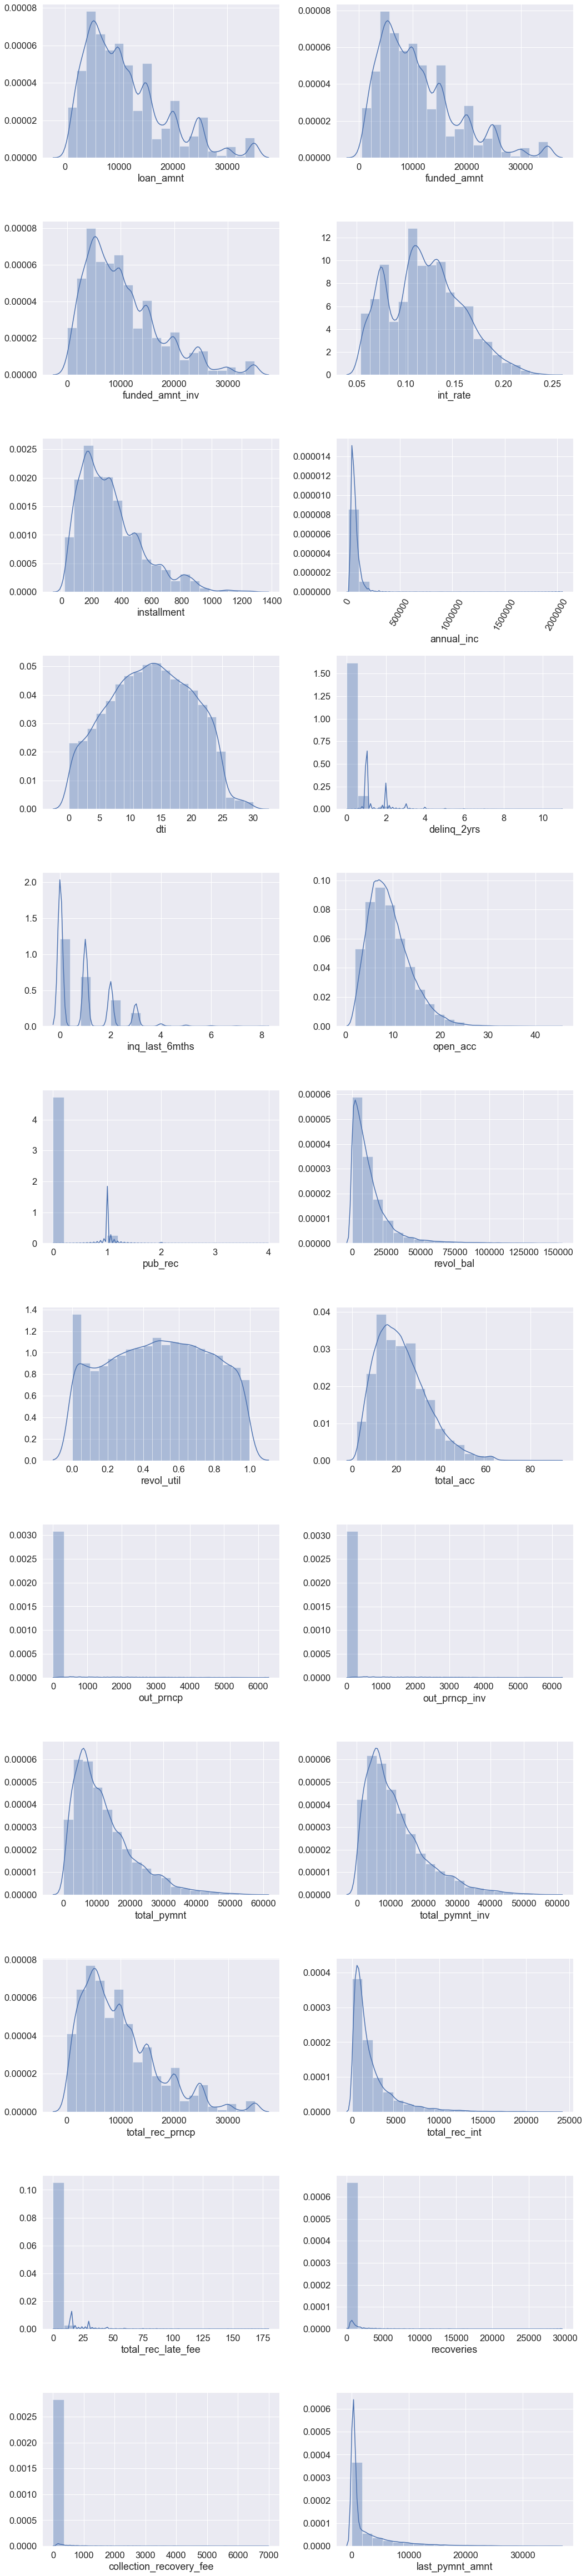

In [35]:
num_cols=[]
plt.figure(figsize=(15,75))
n=1
for col in df.select_dtypes(('float64', 'int64')):
    plt.subplot(14,2,n)
    sns.distplot(df[col], kde=True, bins=20)
    plt.tight_layout()
    if col=='annual_inc':
        plt.xticks(rotation=60)
    n=n+1
    num_cols.append(col)
plt.show()
    

We can see that almost all the columns are positively skewed! loan_amnt, funded_amnt , funded_amnt_inv are all having the same charateritic, similarly with total_pymnt and total_pymnt_inv also with out_prncp and out_prncp_inv. 

We notice that variables like 'pub_rec', 'delinq_2yrs', inq_last_6mths' are categorical in nature. its better we check about its continuity and then convert these variable in to categorical variables.

In [36]:
print ('Unique variables of of pub_rec variable:', df['pub_rec'].unique())
print ('Unique variables of of delinq_2yrs variable:', df['delinq_2yrs'].unique())
print ('Unique variables of of inq_last_6mths:', df['inq_last_6mths'].unique())

Unique variables of of pub_rec variable: [0 1 2 3 4]
Unique variables of of delinq_2yrs variable: [ 0  2  3  1  4  6  5  8  7  9 11]
Unique variables of of inq_last_6mths: [1 5 2 0 3 4 6 7 8]


We can clearly see that there is no harm in converting the above variables in to categorical. This will help us in easier interpretation of the variables during visualization 

In [37]:
cats=['pub_rec', 'delinq_2yrs', 'inq_last_6mths']

In [38]:
for cat in cats:
    df[cat]=df[cat].astype('category')

Univariate Analysis: Categorical Variables

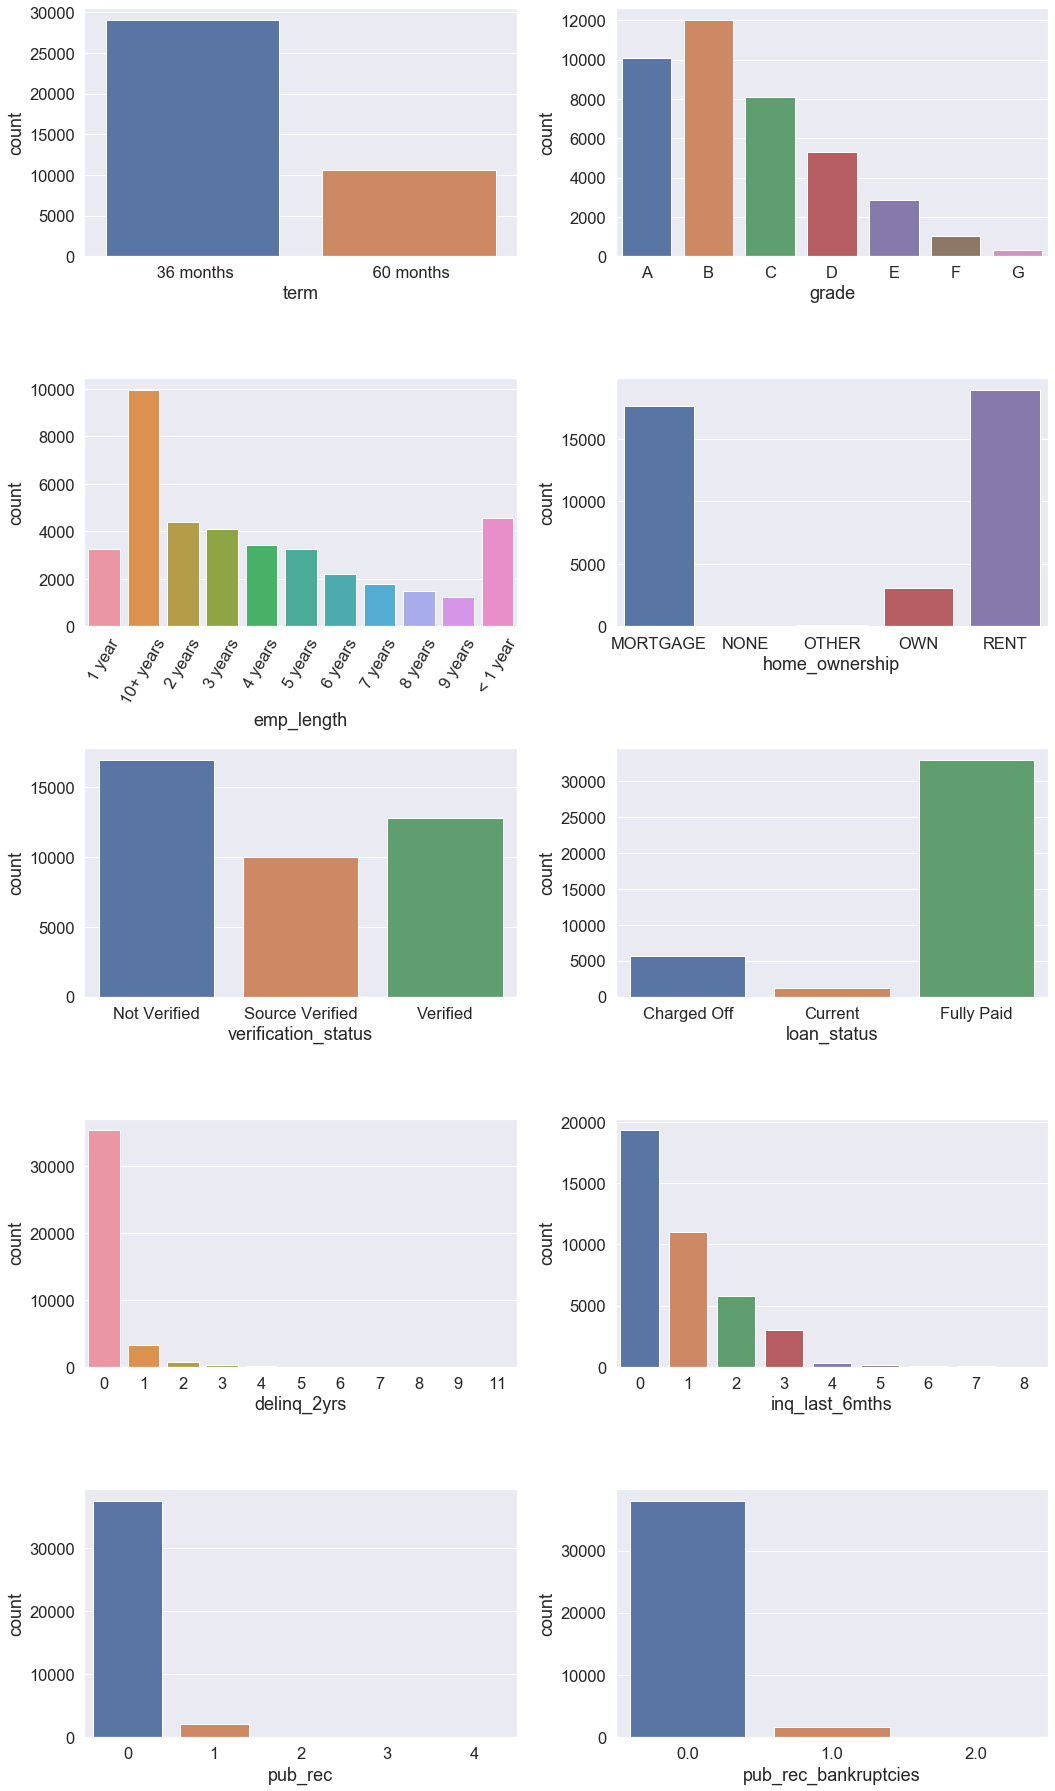

In [39]:
cat_cols=[] 
plt.figure(figsize=(15,40))
n=1
for col in df.select_dtypes('category'):
    plt.subplot(8,2,n)
    sns.countplot(x=col, data=df)
    plt.tight_layout()
    if col=='emp_length':
        plt.xticks(rotation=60)
    n=n+1
    cat_cols.append(col)
plt.show()

from the above graph we can infer that people who are working for more than 10 years are more likely to apply for loan. We also see that their home_ownership is mostly either Mortgage or on rent. this means that the loan that they have applied are mostly home loans. we also see maximum no. of applicant have good record of bankruptcies. 

Time Series Visualization:

lets create a copy of the data set and we'll use the copy for time series visualization.

In [40]:
df_copy=df.copy()   

Lets check the no. of loans approved per year

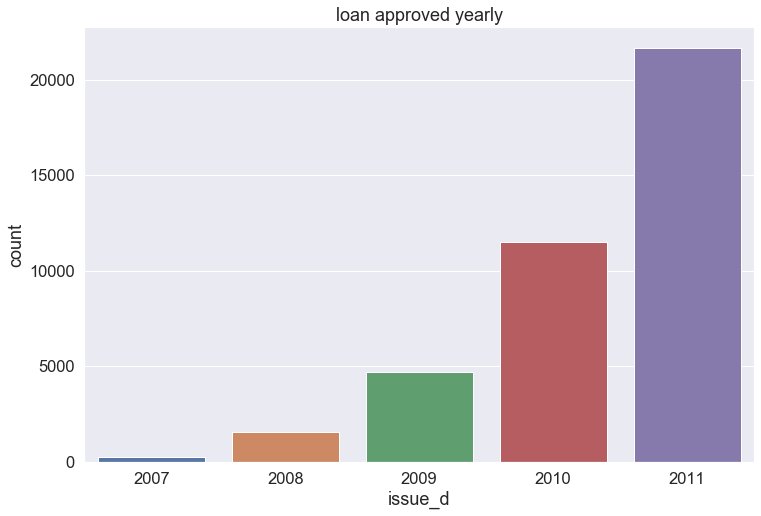

In [41]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sns.countplot(df_copy['issue_d'].dt.year)
plt.title('loan approved yearly')
plt.show()

We can see that the loan approval has been increasing consistanly from 2007 to 2011.

Now lets see yearly loan amount sanctioned

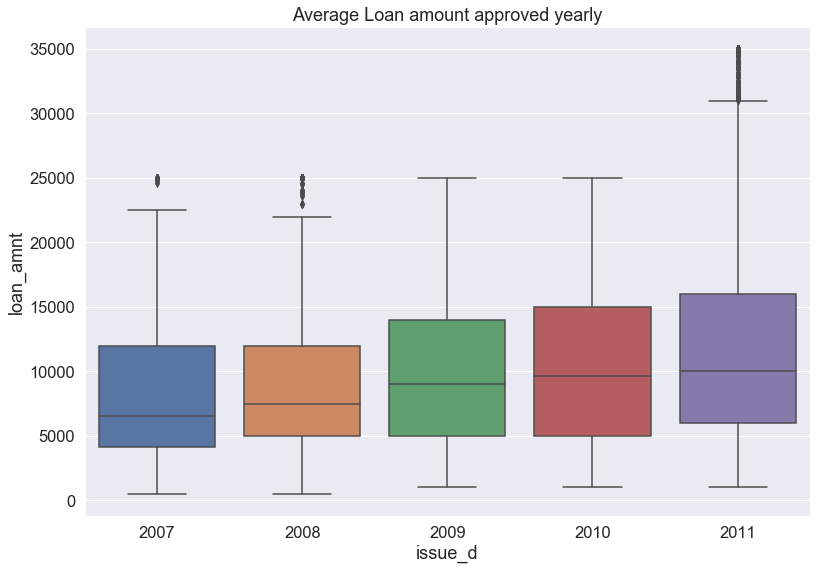

In [42]:
plt.figure(figsize=(13,9))
sns.boxplot(df_copy['issue_d'].dt.year, df_copy['loan_amnt'])
plt.title('Average Loan amount approved yearly')
plt.show()

We can say that due to economic inflation there has been an increase in the loan_amount issued from year 2007 to 2011.

Text(0.5, 1.0, 'Relation between the loan issued and earliest credit line')

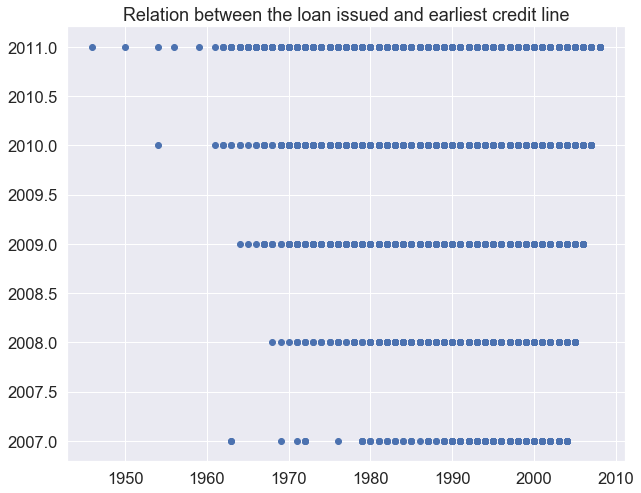

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(df['earliest_cr_line'].dt.year,df['issue_d'].dt.year)
plt.title('Relation between the loan issued and earliest credit line')

We notice that Credit line that were opened before 1960 got their loan issued after 2010, but after 1970 the loan issuance was almost spontaneous.

In [44]:
loan_amount=df_copy.loc[:, ('issue_d', 'loan_amnt')]
loan_amount.set_index('issue_d', inplace=True)
monthly=loan_amount.resample('M').sum()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


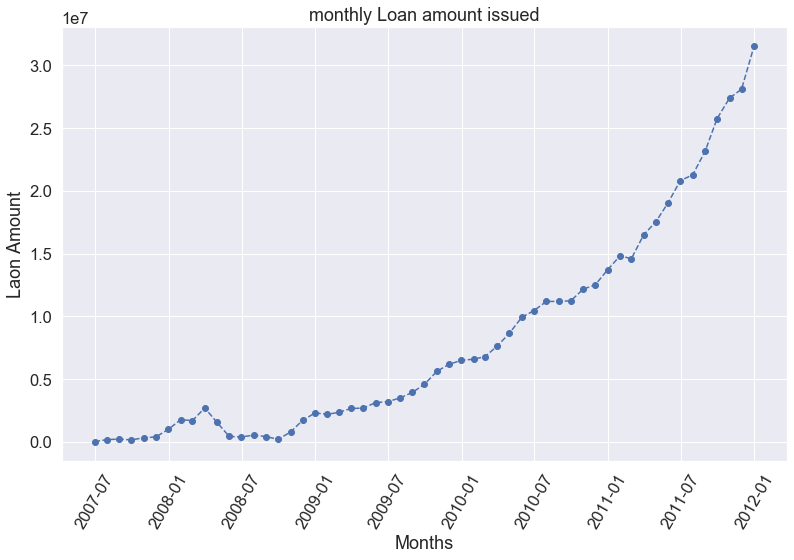

In [45]:
plt.figure(figsize=(13,8))
plt.plot(monthly,linestyle='--', marker='o')
plt.title('monthly Loan amount issued')
plt.ylabel('Laon Amount')
plt.xticks(rotation=60)
plt.xlabel('Months')
plt.show()

We notice that the loan amount has increased consistantly from 2009 onwards. between 2010 to 2012, the loan amount increase is rapid

In [46]:
time_status=df_copy.loc[:,('issue_d', 'loan_status')]
time_status['year']=time_status['issue_d'].dt.year
time_status.head()

,issue_d,loan_status,year
0,2011-12-01,Fully Paid,2011
1,2011-12-01,Charged Off,2011
2,2011-12-01,Fully Paid,2011
3,2011-12-01,Fully Paid,2011
4,2011-12-01,Current,2011


In [47]:
time_count=(time_status.reset_index()
            .groupby(['year','loan_status'], as_index=False).count()
            .rename(columns={"index": "count"})
            )
time_count=time_count.drop('issue_d', axis=1)

In [48]:
time_count.head()

,year,loan_status,count
0,2007,Charged Off,45.0
1,2007,Current,NaN
2,2007,Fully Paid,206.0
3,2008,Charged Off,247.0
4,2008,Current,NaN


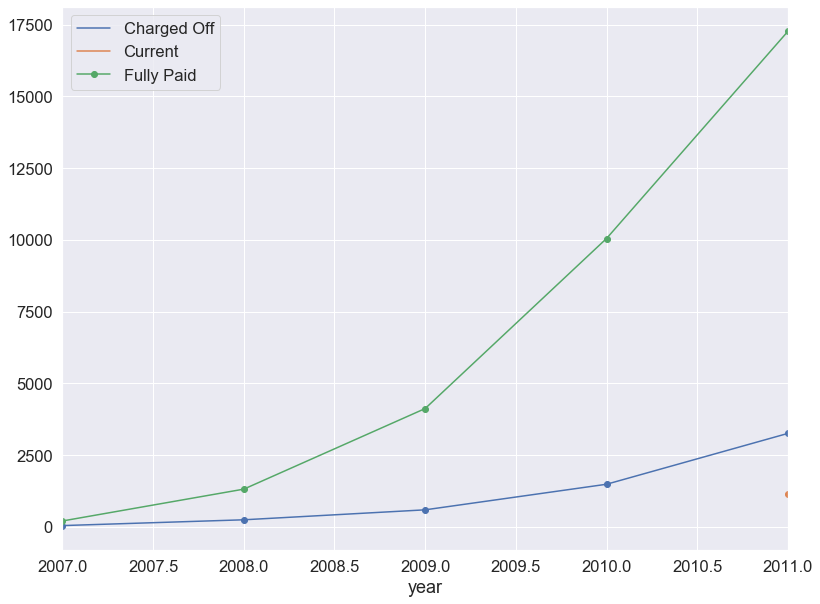

In [49]:
fig, ax=plt.subplots(figsize=(13,10))
for i, j in time_count.groupby('loan_status'):
    j.plot(x='year', y='count', ax=ax, label=i, marker='o')
plt.show()    

 from the above graph we infer that loan issued between 2009 to 2011 there is been a increase in the no. of defaulters. The Obeservation that are currently paying have issued thier loan after 2011 only

#### Bi-variate Analysis

Correlation check between independent varibables to avoid multicollinearity 

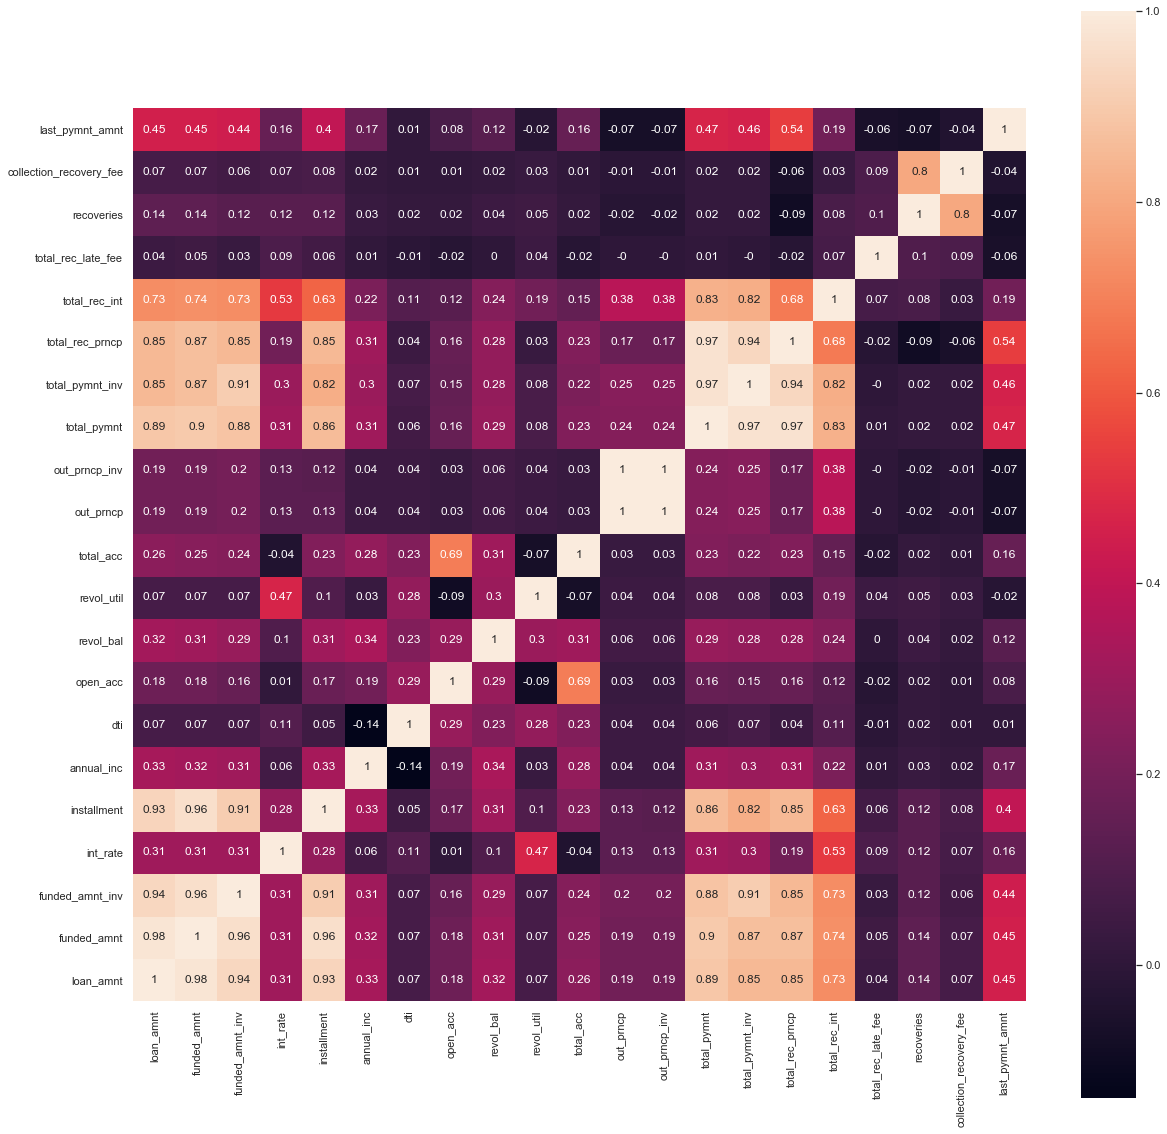

In [50]:
sns.set(font_scale=1)
plt.figure(figsize=(20,20))
corr=round(df.corr(),2)
ax=sns.heatmap(corr,square=True, annot=True)
bottom, top=ax.get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)
plt.show()

from the above Map we see a lot of correlation between the loan_amnt, funded_amnt, funded_amnt_inv. Its better to consider only the loan_amnt variable for further iterations 

we see 99.98% of correlation between (out_prncp and out_prncp_inv) and 97% correlation between(toal_pymnt, total_rec_prncp and total_pymnt_inv), so its safe to drop one of them in each category

In [51]:
df=df.drop(['funded_amnt','funded_amnt_inv', 'out_prncp_inv','total_pymnt_inv', 'total_rec_prncp'], axis=1)

In [52]:
def bi_variate(data, col1, col2):
        cross_tab=pd.crosstab(df[col1], df[col2])
        sns.set(font_scale=1)
        cross_tab.plot.bar(stacked=False, figsize=(12,8))
        plt.xlabel('{}'.format(col1), fontsize=14)
        plt.ylabel('{}'.format(col2), fontsize=14)
        plt.title('{} Vs price'.format(col1), fontsize=14)
        plt.xticks(rotation=45)
        plt.legend(loc='best')
        plt.show()
        return cross_tab

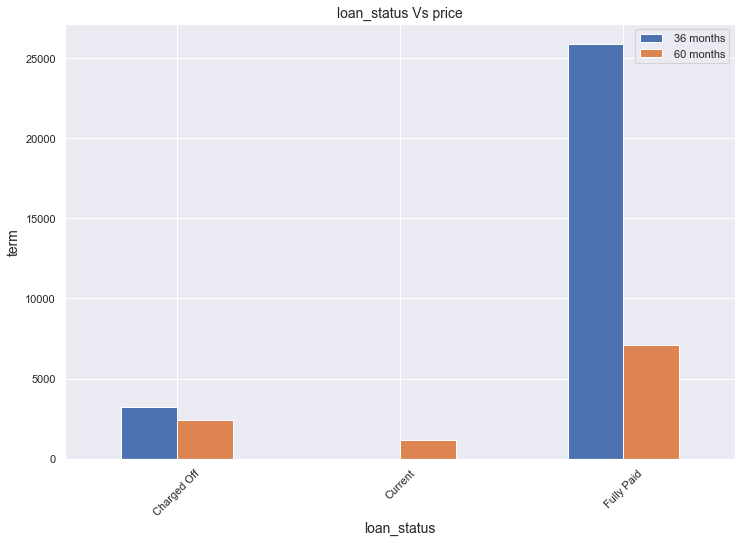

term,36 months,60 months
loan_status,,
Charged Off,3227,2400
Current,0,1140
Fully Paid,25868,7080


In [53]:
bi_variate(df, 'loan_status', 'term')

we notice that people with 60 months term are the only people who are currently paying, otherwise 30 moths are either fully paid or charged off!
after seeing this graph, it would be better if we can visualize this in terms of the loan amount too.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


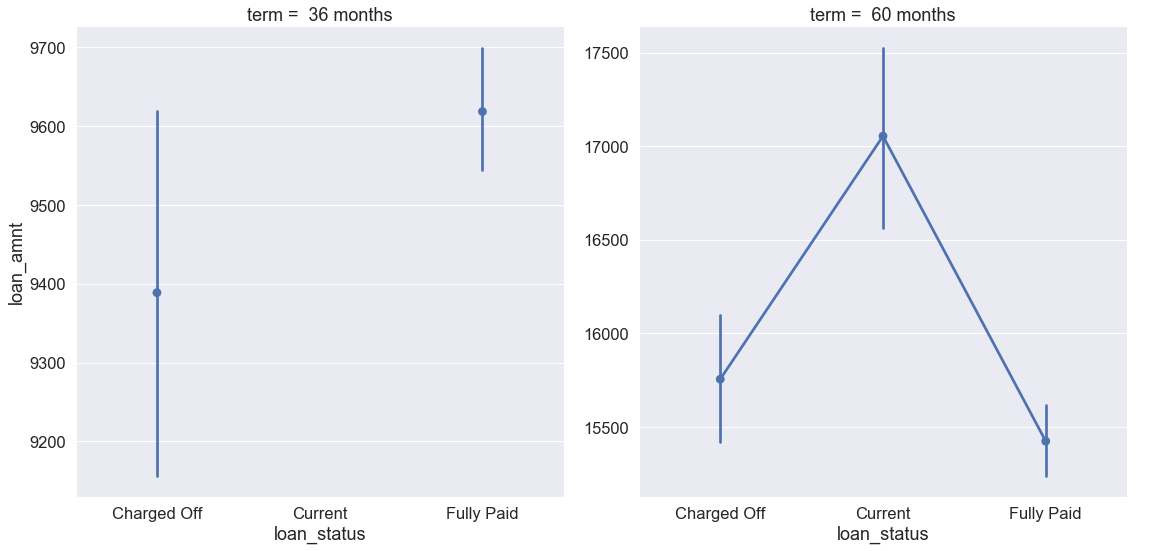

In [54]:
sns.set(font_scale=1.5)
facet_grid=sns.FacetGrid(df, col='term', size=8, sharex=False, sharey=False )
facet_grid.map(sns.pointplot, 'loan_status', 'loan_amnt', palette=None, order=None, hue_order=None)
facet_grid.add_legend()

from the above graph we infer that loan_amount>=15000, get a term of 60 month and loan_amount <=10000 get a term of 36 months. the 'currently paying' observation are in the 60 moths terms, and their loan amount is above 16,500.

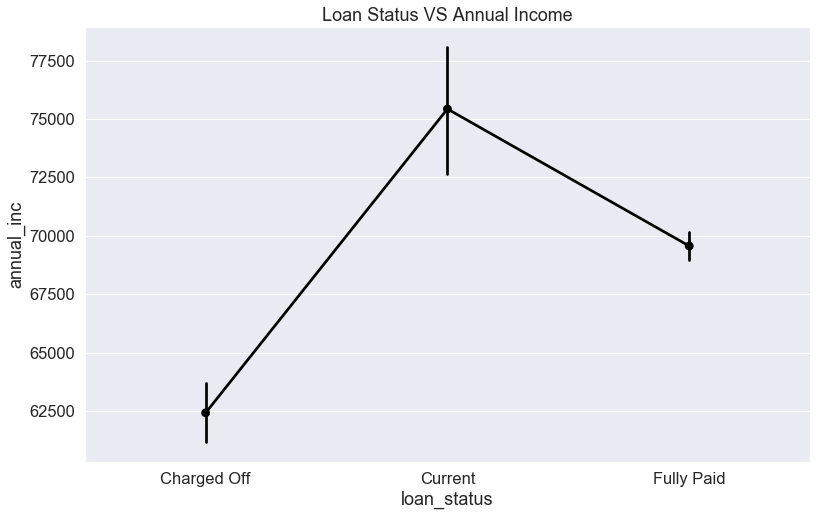

In [55]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13,8))
sns.pointplot(x='loan_status', y='annual_inc', data=df, color='black')
plt.title('Loan Status VS Annual Income')
plt.show()

from the above table we clearly see that people with annual income lower than 65,000 have charged off. We can say the people with lower income have the higher chances of defaulting the payment. people who are currently paying their loan are having their annual income higher than 72500/-

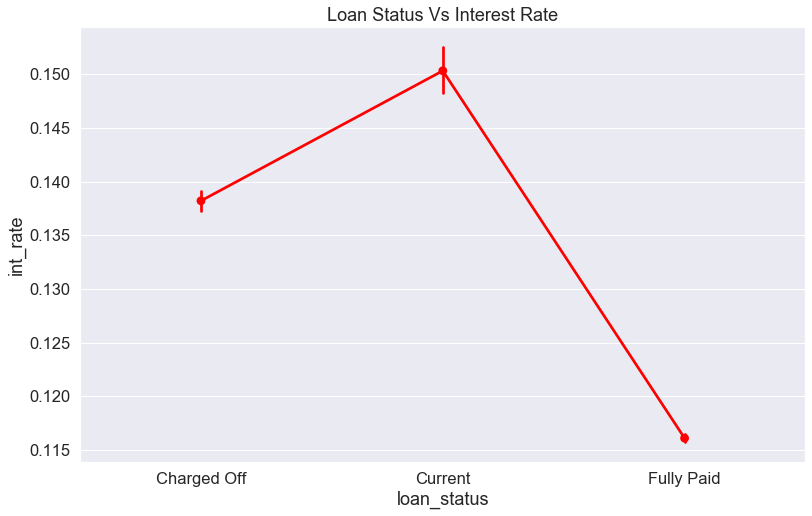

In [56]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13,8))
sns.pointplot(x='loan_status', y='int_rate', data=df, color='red')
plt.title('Loan Status Vs Interest Rate')
plt.show()

Lets summarise: 

Charged off: 
 People with annual income around 62K, applied for loan amount 9K to 16K at an interest rate of 13.8%

Fully paid:     People with annual income around 70K, applied for loan amount 9K to 16K at an interest rate of 11.5%

Currently paying: 
 People with annual income around 75K, applied for loan amount 16.5K to 17.5K at an interest rate of 15%- these loans were issues after 2011 with a term for 60 months. 

from the above summary we can say that people with lower annual income applied the same loan amount as that of the fully paid category at a higher interest rate which is 13.8% which is almost the same interest paid by the currently paying category.

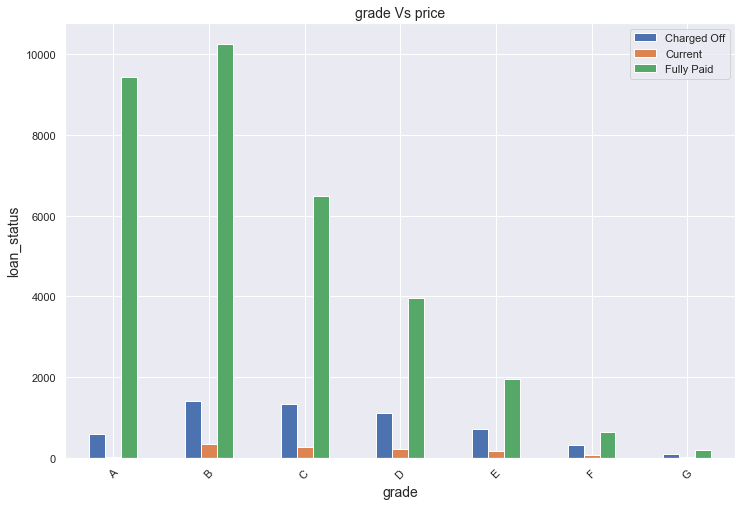

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,602,40,9443
B,1425,345,10249
C,1347,264,6486
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


In [57]:
bi_variate(df, 'grade', 'loan_status')

from the above graph we can see that garde A customers are very less likely to defaults. But, We need to be very careful with Gade E, Grade F and Grade G customers as their chances of defaulting is higher as compared to all other grade.

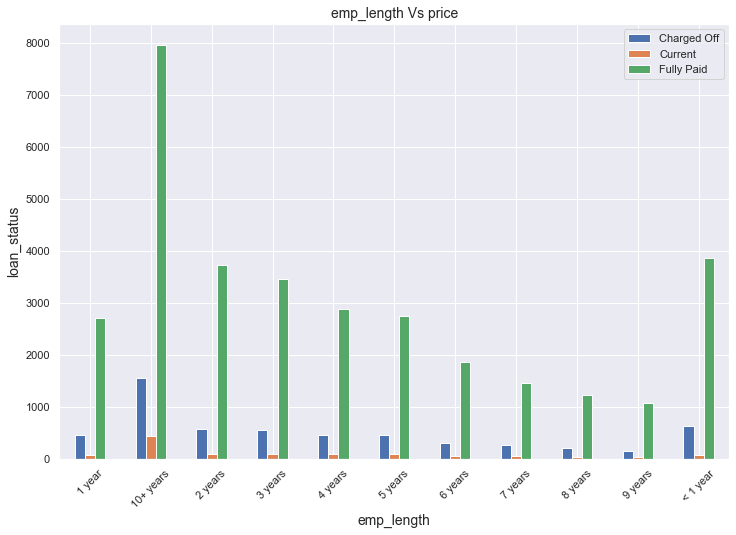

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,456,71,2713
10+ years,1559,433,7961
2 years,567,97,3724
3 years,555,83,3456
4 years,462,94,2880
5 years,458,88,2736
6 years,307,61,1861
7 years,263,62,1448
8 years,203,44,1232


In [58]:
bi_variate(df, 'emp_length', 'loan_status')

people with 10+ years of emp_length are the maximum likely to take a loan.

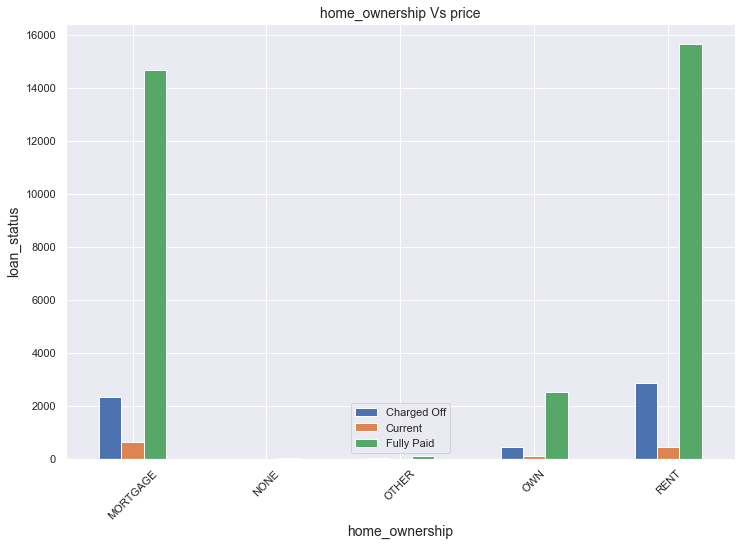

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2327,638,14692
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2532
RENT,2839,419,15641


In [59]:
bi_variate(df,'home_ownership', 'loan_status')

 from the above graph we can see that people living in rented house or house under mortgage have applied from loan. We can also see that people are charging off from all different categories of home_ownership 

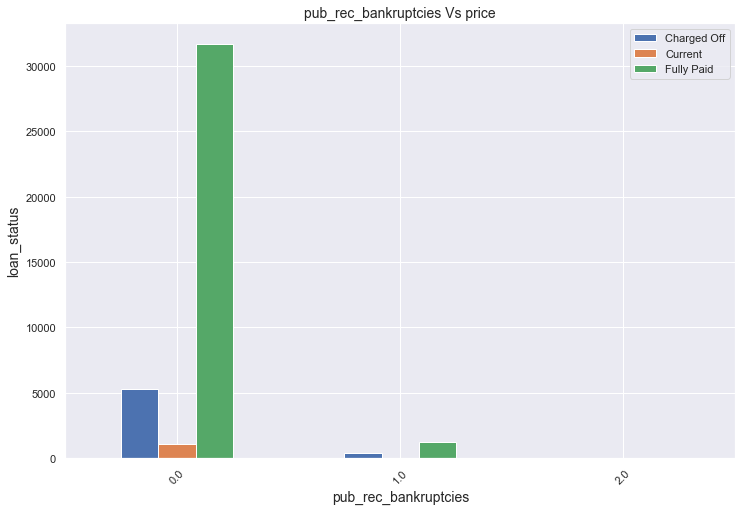

loan_status,Charged Off,Current,Fully Paid
pub_rec_bankruptcies,,,
0.0,5259,1101,31674
1.0,366,37,1271
2.0,2,2,3


In [60]:
bi_variate(df,'pub_rec_bankruptcies', 'loan_status')

People with higher record of bankruptencies have higher chances of defaulting the payment.

###### DTI: The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.

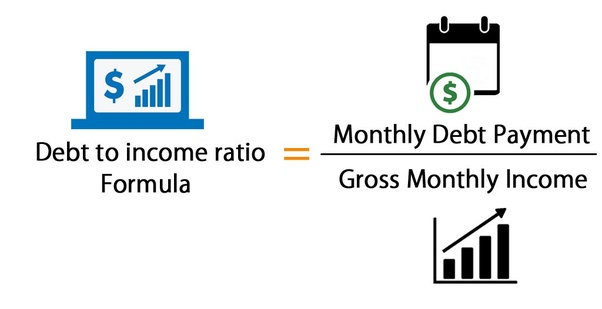

In [61]:
from IPython.display import Image
Image(filename='D:\Datascience\DTI.jpg', width=400, height=400)

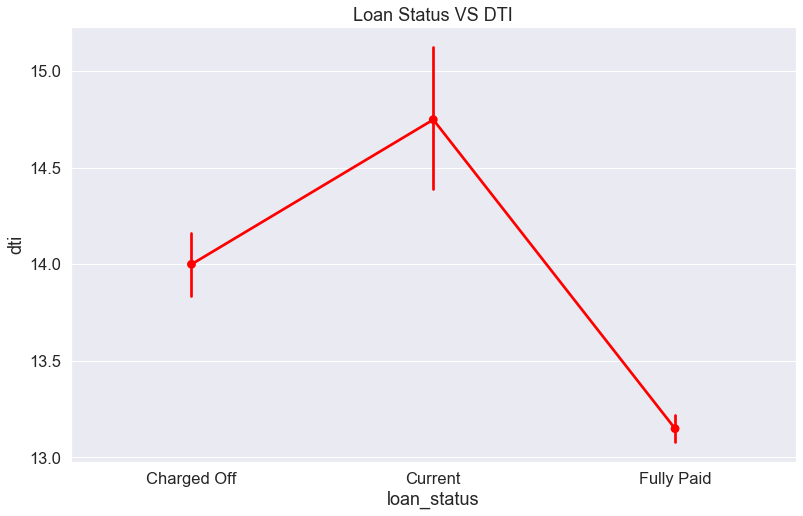

In [62]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13,8))
sns.pointplot(x='loan_status', y='dti', data=df, color='red')
plt.title('Loan Status VS DTI')
plt.show()

We can clearly see that people with lower DTI tend to pay the Loan amount completely, but DTI higher that 13, they are at high risk of defaulting the payment. We also see that people who are currently paying the loan amount have a higher DTI than the defaulters. We need to go for deeper analysis for the same.

In [63]:
grouped=df.groupby('loan_status')     # grouping the data set with respect to the loan_status
current=grouped.get_group('Current')   #get the currently paying group
paid=grouped.get_group('Fully Paid')  # get the fully paid group
default=grouped.get_group('Charged Off')  # get the charged off group

In [64]:
groups=[current, paid, default]
labels=['Current', 'Paid', 'Default']

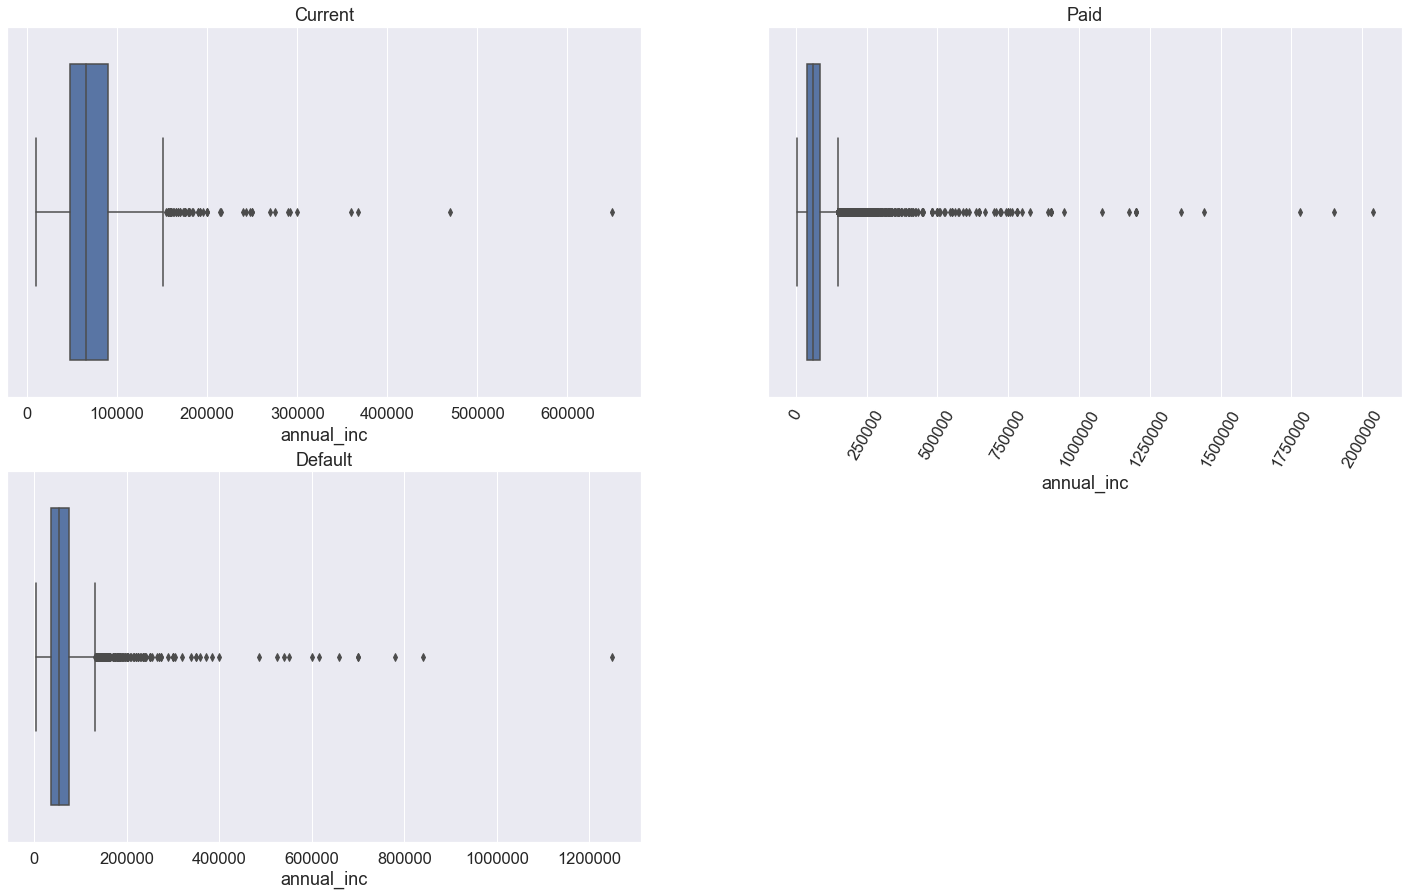

In [65]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25,15))
n=1
for i,j in enumerate(groups):
    plt.subplot(2,2,n)
    sns.boxplot(j['annual_inc'])
    plt.title(labels[i])
    if i==1:
           plt.xticks(rotation=60)
    n=n+1
plt.show()

We notice there is some  difference in the salary ranges of differnt groups in the loan_status variable. This explains that the DTI is more influenced by the record of monthly dept payment and the annual income, registered during loan application.

lets convert all other numerical columns into categorical columns

#### pre processing Data set for model fitting

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 30 columns):
loan_amnt                  39715 non-null int64
term                       39715 non-null category
int_rate                   39715 non-null float64
installment                39715 non-null float64
grade                      39715 non-null category
emp_length                 39715 non-null category
home_ownership             39715 non-null category
annual_inc                 39715 non-null float64
verification_status        39715 non-null category
issue_d                    39715 non-null datetime64[ns]
loan_status                39715 non-null category
dti                        39715 non-null float64
delinq_2yrs                39715 non-null category
earliest_cr_line           39715 non-null datetime64[ns]
inq_last_6mths             39715 non-null category
open_acc                   39715 non-null int64
pub_rec                    39715 non-null category
revol_bal             

In [67]:
date_cols=[]
for col in df.select_dtypes('datetime64'):
    date_cols.append(col)

In [68]:
df=df.drop(date_cols, axis=1)   # for modelling we do not need the the datetime variables

In [69]:
df.reset_index(inplace=True, drop=True)  # since the 'issue_d' variable was in the index we'll reset index and drop that col

In [70]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,0.1065,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,27.65,0,1,3,0,13648,0.837,9,0.00,5863.155187,863.16,0.00,0.00,0.00,171.62,0.0
1,2500,60 months,0.1527,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,1.00,0,5,3,0,1687,0.094,4,0.00,1008.710000,435.17,0.00,117.08,1.11,119.66,0.0
2,2400,36 months,0.1596,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,8.72,0,2,2,0,2956,0.985,10,0.00,3005.666844,605.67,0.00,0.00,0.00,649.91,0.0
3,10000,36 months,0.1349,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,20.00,0,1,10,0,5598,0.210,37,0.00,12231.890000,2214.92,16.97,0.00,0.00,357.48,0.0
4,3000,60 months,0.1269,67.79,B,1 year,RENT,80000.0,Source Verified,Current,17.94,0,0,15,0,27783,0.539,38,524.06,3513.330000,1037.39,0.00,0.00,0.00,67.79,0.0


In [71]:
cat_cols=[]
for col in df.select_dtypes('category'):
    cat_cols.append(col)

In [72]:
num_col=[]
for col in df.select_dtypes(('float64', 'int64')):
    num_col.append(col)

Lets label encode the categorical variables and scale the numerical variables for fitting models

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [74]:
for col in cat_cols:
    df[col]=le.fit_transform(df[col].astype('str'))

In [75]:
cat=df.loc[:,cat_cols]

In [76]:
cat.head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,pub_rec_bankruptcies
0,0,1,1,4,2,2,0,1,0,0
1,1,2,10,4,1,0,0,5,0,0
2,0,2,1,4,0,2,0,2,0,0
3,0,2,1,4,1,2,0,1,0,0
4,1,1,0,4,1,1,0,0,0,0


In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
nums=df.loc[:,num_col]
numeric=MinMaxScaler().fit_transform(nums)
num=pd.DataFrame(numeric, columns=num_col)

In [79]:
num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,0.130435,0.272822,0.114137,0.009824,0.921974,0.023810,0.091237,0.837838,0.079545,0.000000,0.100116,0.036631,0.000000,0.000000,0.000000,0.004752
1,0.057971,0.513824,0.034230,0.012771,0.033344,0.023810,0.011278,0.094094,0.022727,0.000000,0.017224,0.018468,0.000000,0.003952,0.000159,0.003313
2,0.055072,0.549817,0.053230,0.004053,0.290764,0.000000,0.019761,0.985986,0.090909,0.000000,0.051323,0.025704,0.000000,0.000000,0.000000,0.017995
3,0.275362,0.420970,0.250965,0.022203,0.666889,0.190476,0.037423,0.210210,0.397727,0.000000,0.208865,0.093997,0.094173,0.000000,0.000000,0.009898
4,0.072464,0.379238,0.040403,0.037332,0.598199,0.309524,0.185730,0.539540,0.409091,0.083033,0.059992,0.044025,0.000000,0.000000,0.000000,0.001877


In [80]:
data=pd.concat([cat,num],axis=1)

In [81]:
data.shape

(39715, 26)

lets check for corrrelation of different columns with the target variable in a graphical fromat

In [82]:
feature=data.drop('loan_status', axis=1)  # independet variables
x=feature

In [83]:
target=df['loan_status']       #target Variables
y=target

In [84]:
from yellowbrick.target import FeatureCorrelation 
#library for checking the the correaltion between target and independent variables 

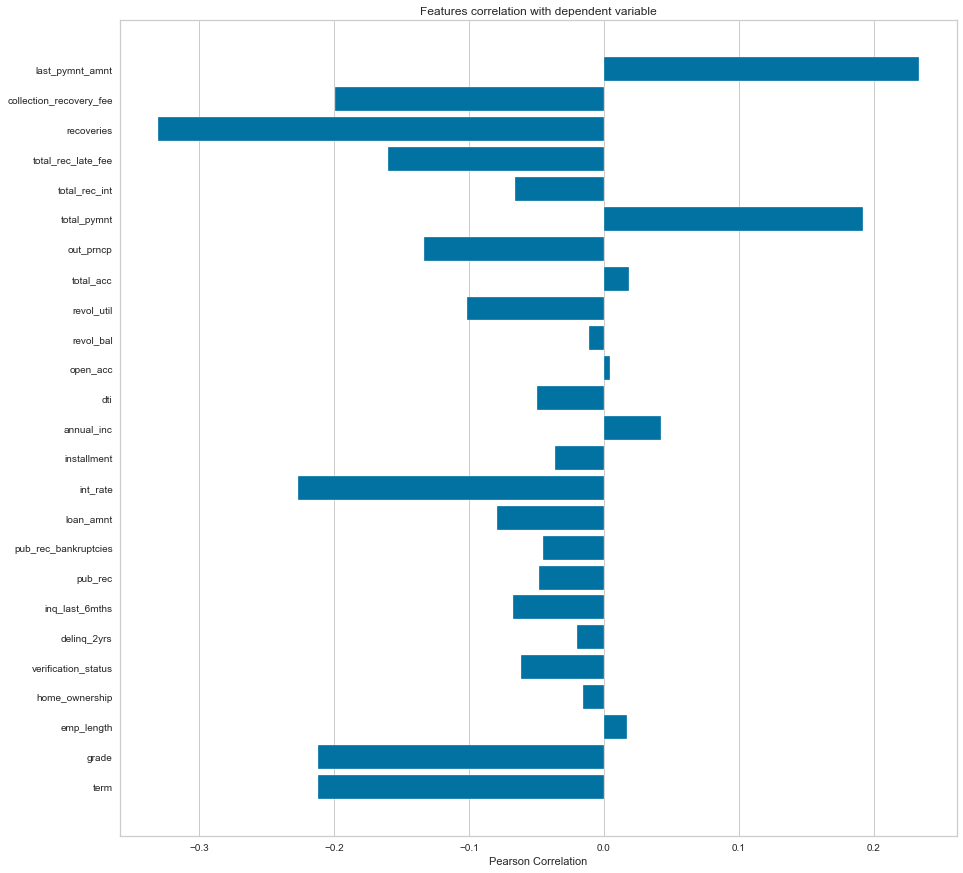

In [85]:
plt.figure(figsize=(15,15))
visualizer=FeatureCorrelation(labels=feature.columns)
visualizer.fit(feature,target)
visualizer.show()

in the above graph, we see variables term, interest_Rate, grade, total_payment, total_rec_prncp, recoveries, collection_recovery fees and last_paymnt_amnt are highly correlated variables.

Lets just keep them aside for future use


In [86]:
corr_feature=['term', 'int_rate', 'grade','total_pymnt', 'total_rec_prncp', 'total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_amnt'] 

In [87]:
x_corr=data.loc[:,corr_feature] # gathering only the highly correlated variables together for future use

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [88]:
x_corr.head()

,term,int_rate,grade,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,0,0.272822,1,0.100116,NaN,0.000000,0.000000,0.000000,0.004752
1,1,0.513824,2,0.017224,NaN,0.000000,0.003952,0.000159,0.003313
2,0,0.549817,2,0.051323,NaN,0.000000,0.000000,0.000000,0.017995
3,0,0.420970,2,0.208865,NaN,0.094173,0.000000,0.000000,0.009898
4,1,0.379238,1,0.059992,NaN,0.000000,0.000000,0.000000,0.001877


##### Modelling

lets split the train and test 

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [91]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(31772, 25)
(7943, 25)
(31772,)
(7943,)


Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression # import logistic regression for modelling

In [94]:
logreg=LogisticRegression()
logistic=logreg.fit(x_train, y_train)
ypred_log=logistic.predict(x_test)
logreg_score=round(logreg.score(x_train,y_train)*100,2)
print('Accuracy score of Logistic Regression model:', logreg_score)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score of Logistic Regression model: 95.35


In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred_log)

0.9532922069746947

KNN-classifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier # import KNN classifier for modelling

In [97]:
k_model=KNeighborsClassifier(n_neighbors=7)
knn=k_model.fit(x_train,y_train)
ypred_knn=knn.predict(x_test)
knn_score=round(knn.score(x_train,y_train)*100,2)
print('Accuracy score of KNeighbors model:', knn_score)

Accuracy score of KNeighbors model: 85.26


In [98]:
accuracy_score(y_test,ypred_knn)


0.8299131310587939

Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier for modelling

In [100]:
DT=DecisionTreeClassifier()
dtree=DT.fit(x_train,y_train)
ypred_tree=dtree.predict(x_test)
dtree_score=round(dtree.score(x_train,y_train)*100,2)
print('Accuracy score of Decaion Tree model:', dtree_score)

Accuracy score of Decaion Tree model: 100.0


In [101]:
accuracy_score(y_test, ypred_tree)

0.9901800327332242

Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier  #importing Randomforest classifier for modelling

In [103]:
forest=RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
random=forest.fit(x_train, y_train)
ypred_forest=random.predict(x_test)
forest_score=round(random.score(x_train,y_train)*100,2)
print('Accuracy score of Random Forest model:', forest_score)

Accuracy score of Random Forest model: 99.61


In [104]:
accuracy_score(y_test,ypred_forest)

0.9909354148306685

#### Balacing the Data set: 

 As we notice in the EDA thae target has severe class imbalance with 83% fully paid and 2.9% are currently paying thier loan. and 14.2% have charged-off, so lets undersample our majority class and try again fitting the model. We are also not very much interested in the curretly paying observation so lets exclude them in this iteration and see the outcomes

In [105]:
data=data.sample(frac=1, random_state=4) #shuffling the data set

In [106]:
data.head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,pub_rec_bankruptcies,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
34092,0,0,2,4,0,2,0,3,0,0,0.217391,0.121022,0.181512,0.039788,0.235412,0.166667,0.033672,0.167167,0.238636,0.000000,0.152054,0.038400,0.0,0.0,0.0,0.073805
9381,1,1,3,0,2,1,0,0,0,0,0.594203,0.316641,0.278558,0.096277,0.281427,0.071429,0.227652,0.801802,0.193182,0.241484,0.356906,0.228141,0.0,0.0,0.0,0.010380
21224,0,1,1,4,1,2,0,0,0,0,0.402899,0.219092,0.346181,0.029473,0.252084,0.309524,0.030658,0.185185,0.386364,0.000000,0.258675,0.031784,0.0,0.0,0.0,0.342864
10410,0,1,6,0,1,2,0,0,0,0,0.171014,0.290558,0.150299,0.017192,0.693565,0.047619,0.000000,0.000000,0.102273,0.000000,0.115786,0.016162,0.0,0.0,0.0,0.153218
37317,0,2,2,4,0,2,0,0,0,0,0.159420,0.387063,0.144257,0.019155,0.398466,0.095238,0.023511,0.404404,0.079545,0.000000,0.123994,0.053537,0.0,0.0,0.0,0.005636


In [107]:
data.shape

(39715, 26)

In [108]:
charged_off=data.loc[data['loan_status']==0] #seggregating the charge off data saperate
charged_off.shape

(5627, 26)

In [109]:
paid_full=data.loc[data['loan_status']==2].sample(n=6000, random_state=90) #seggregating the fully paid separately and undersampling
paid_full.shape

(6000, 26)

In [111]:
sampled_df=pd.concat([charged_off, paid_full], axis=0) 

In [112]:
sampled_df=sampled_df.sample(frac=1, random_state=9)
sampled_df.head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,pub_rec_bankruptcies,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
13813,0,0,1,3,0,2,0,0,0,0,0.188406,0.081899,0.155425,0.023971,0.791264,0.309524,0.504018,0.389389,0.329545,0.0,0.132449,0.032113,0.0,0.0,0.0,0.014888
7560,0,2,4,4,2,2,0,2,0,0,0.159420,0.549817,0.151330,0.028196,0.690897,0.428571,0.161738,0.555556,0.306818,0.0,0.129596,0.067460,0.0,0.0,0.0,0.006186
7687,1,1,1,0,1,2,0,2,0,0,0.402899,0.269692,0.228360,0.027508,0.408803,0.190476,0.068435,0.265265,0.227273,0.0,0.294055,0.119715,0.0,0.0,0.0,0.254482
761,0,1,3,4,0,2,0,0,0,0,0.101449,0.379238,0.091888,0.037332,0.722241,0.214286,0.171110,0.973974,0.170455,0.0,0.082482,0.035243,0.0,0.0,0.0,0.003884
18597,0,2,8,4,1,2,0,1,0,0,0.228986,0.398539,0.207515,0.047156,0.409470,0.476190,0.087487,0.525526,0.375000,0.0,0.174131,0.076292,0.0,0.0,0.0,0.008363


Target and Feature splitting , lets check for any changes in the correlation

In [113]:
sampled_x=sampled_df.drop('loan_status', axis=1)
sampled_y=sampled_df['loan_status']

Lets do the train test split

In [115]:
sample_x_train, sample_x_test, sample_y_train, sample_y_test=train_test_split(sampled_x, sampled_y, test_size=0.2, random_state=1)

In [116]:
print(sample_x_train.shape)       # its always better to check the shapes first
print(sample_x_test.shape)
print(sample_y_train.shape)
print(sample_y_test.shape)


(9301, 25)
(2326, 25)
(9301,)
(2326,)


#### Conclusion:

form the grid search we the best parameter. Lets fit and predict using Random Forest Classifier

Random Forest:

In [122]:
forest=RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
random=forest.fit(sample_x_train, sample_y_train)
sample_ypred_forest=random.predict(sample_x_test)
forest_score=round(random.score(x_train,y_train)*100,2)
print('Accuracy score of Random Forest model:', forest_score)

Accuracy score of Random Forest model: 96.79


In [123]:
accuracy_score(sample_y_test, sample_ypred_forest)

0.9806534823731728

Lets double check the accuracy using k-fold cross validation

In [124]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [126]:
scores=cross_val_score(forest, sample_x_train, sample_y_train, cv=10, scoring='accuracy')
print('scores:', scores)
print('Mean_scores:', scores.mean())
print('standar deviation:', scores.std())

scores: [0.97851772 0.97959184 0.98064516 0.98494624 0.98602151 0.98709677
 0.97204301 0.97419355 0.98064516 0.97308934]
Mean_scores: 0.979679030084276
standar deviation: 0.005079760941362834


We can see that mean score is 97.96 with a standart deviation of 0.005

In [128]:
importances=np.round(random.feature_importances_,3)  # calculate the importances of the feature

In [132]:
result=pd.DataFrame({'Feature':sample_x_train.columns, 'Importance': importances})
result.sort_values(by='Importance', ascending=False)    #result in a tabular format is more presentable

,Feature,Importance
22,recoveries,0.306
23,collection_recovery_fee,0.207
19,total_pymnt,0.162
24,last_pymnt_amnt,0.105
9,loan_amnt,0.044
11,installment,0.042
20,total_rec_int,0.030
10,int_rate,0.020
0,term,0.017
1,grade,0.011


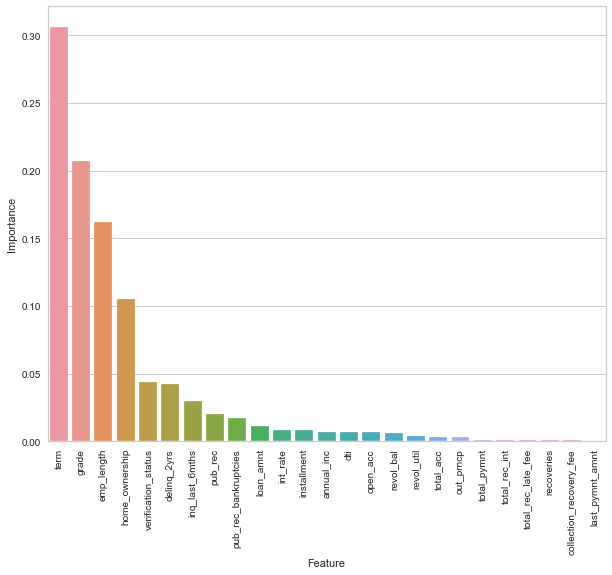

In [134]:
plt.figure(figsize=(10,8))
plot=sns.barplot(x='Feature', y='Importance', data=result.sort_values(by='Importance', ascending=False))
plot.set_xticklabels(result.Feature, rotation=90)
plt.show()

Lets check the classification report on yPrediction and sample_y_test

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
classification=classification_report(sample_y_test, sample_ypred_forest)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1145
           2       0.96      1.00      0.98      1181

    accuracy                           0.98      2326
   macro avg       0.98      0.98      0.98      2326
weighted avg       0.98      0.98      0.98      2326



In [139]:
matrix=confusion_matrix(sample_y_test, sample_ypred_forest)
print (matrix)

[[1102   43]
 [   2 1179]]


lets graphically present the confusion matrix for better understanding

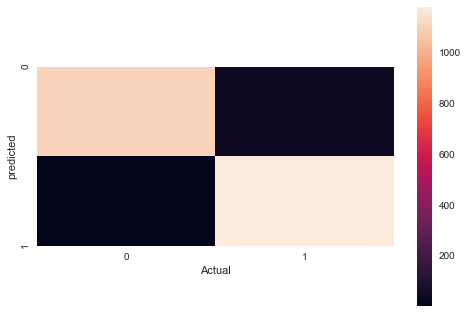

In [140]:
sns.heatmap(matrix, square=True)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()